In [1]:
# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

In [2]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

In [3]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [4]:
def f1(x1, x2):
    # x1 = np.array(x1)
    # x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2

In [5]:
def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) 

### Question 1
Nous allons montrer que l'*ensemble de niveau* $c$ est fermé et borné dans $\mathbb{R}^2$, c'est donc un **compact**.

* Premièrement, $\{c\}$ est un fermé, et $f$ est une fonction *continue*. Ainsi $f^{-1}(\{c\})$ est un fermé et c'est aussi exactement la *courbe de niveau* de $c$  


* Deuxièment, montrons que l'ensemble est borné, c'est à dire qu'il existe $A$ tel que pour tout $(x_1,x_2) \in\mathbb{R}^2,  \|(x_1,x_2)\|\geqslant A \Rightarrow f(x_1,x_2)\neq{c}$.  

On pose $B=2\lvert c\rvert$. Comme $f(x_1,x_2) \underset{\|(x_1,x_2)\| \to +\infty} {\longrightarrow} +\infty$, il existe A tel que :

$$
\forall(x_1,x_2)\in \mathbb{R}^2 , \|(x_1,x_2)\| \geqslant A \Rightarrow f(x_1,x_2) \geqslant B \Rightarrow f(x_1,x_2)\neq c
$$
  Ainsi, l'*ensemble de niveau* de $c$ est borné.

### Question 2
On remarque que $p(x_1,x_2)$ est le déterminant de la matrice composée du vecteur $x-x_0$ et du gradient normalisé de $f$ en $x_0$ : 
$$
p(x_1,x_2)=det(x-x_0,\frac{\partial f(x_0)}{\|\nabla f(x_0)\|})=\frac{1}{\|\nabla f(x_0)\|}
\begin{vmatrix}
x_1-x_{10} & \partial_1 f(x_0)\\
x_2-x_{20} & \partial_2 f(x_0)
\end{vmatrix}
$$

On peut alors interpréter $p(x_1,x_2)$ comme l'aire orientée du parallélogramme formé des vecteurs $x-x_0$ et $\frac{\partial f(x_0)}{\|\nabla f(x_0)\|}$.

### Question 3
On appelle $A$ le voisinage (que l'on prend ouvert) de $x_0$ où $\nabla f$ ne s'annule pas
On considère la fonction $g$ suivante : 
$$
\begin{array}{l|rcl}
g : & A\times \mathbb{R} \subset \mathbb{R}^2 \times \mathbb{R}  & \longrightarrow & \mathbb{R}^2\\
    & (x,t) & \longmapsto & (f(x)-c,p(x)-t) \end{array}
$$
où on note $x=(x_1,x_2)$.

Vérifions maintenant les hypothèses du théorème des fonctions implicites :
* Pour $t_0=0$, $g(x_0,t_0)=0$ car $p(x_0)=0$
* $f$ et $p$ sont continûment différentiables sur A et ainsi $g$ comme combinaison de fonction continûment différentiables est continûment différentiable sur $A \times \mathbb{R}$. 
* De plus, avec le choix de $A$, pour tout $(x,t) \in A \times \mathbb{R}, \partial_x g$ est inversible.
En effet : le déterminant de $\partial_x g(x,t) = \,^t\begin{bmatrix} \nabla f(x)&\nabla p(x)\end{bmatrix}$ est 
$ \frac{-\frac{\partial f}{\partial x_1}(x)\frac{\partial f}{\partial x_1}(x_0) - \frac{\partial f}{\partial x_2}(x)\frac{\partial f}{\partial x_2}(x_0)}{\|\nabla f(x_0)\|} $ qui vaut $-\|\nabla f(x_0)\|<0$ en $x_0$. Ainsi par continuité des dérivées partielles de f, et par continuité de la norme, on peut, quitte à réduire A (réduire pour l'inclusion), considérer que $det(\partial_x g(x,t))<0$.

On peut donc appliquer le théorème des fonctions implicites.
Il existe un voisinage ouvert $B$ de $x_0$ et $U$ de $t_0$ tels que $B \times U \subset A\times \mathbb{R}$ et une unique fonction continûment différentiable $\psi : U \rightarrow \mathbb{R}^2$, telle que pour tout $t\in U$ et tout $x\in B$,
$$
g(x,t)=0 \Leftrightarrow x=\psi(t)$$

Comme $U$ est un voisinage de 0 dans $\mathbb{R}$, il existe $\varepsilon >0$ tel que $]-\varepsilon ,\varepsilon[ \subset U$. La restriction de la proposition à $]-\varepsilon,\varepsilon[$ est toujours vraie en considérant $\gamma$ la restriction de $\psi$ à $]-\varepsilon,\varepsilon[$. On obtient donc pour tout $t\in ]-\varepsilon,\varepsilon[$ et tout $x\in B$,
$$
f(x_1,x_2)=c \ et \ p(x_1,x_2)=t \Leftrightarrow g(x,t)=0 \Leftrightarrow x=(x_1,x_2)=\gamma(t)$$

ce qui répond à la question.

### Question 4
Soit t $\in \left]-\varepsilon, \varepsilon \right[$, calculons $\gamma'(t)$:

Avec $x = \gamma(t) $ , on a :
* $\partial_x g(x,t) = \,^t\begin{bmatrix} \nabla f(x)&\nabla p(x)\end{bmatrix}$, donc $\partial_x g(x,t)^{-1} =\frac{1}{det(\partial_x g(x,t))}\begin{bmatrix} -\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|}&-\partial_2 f(x)\\-\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|}&\partial_1 f(x)\end{bmatrix}$ 
*$\partial_t g(x,t) = \begin{bmatrix} 0\\-1\end{bmatrix}$

Donc d'après la formule issue théorème des fonctions implicites, ${\rm d}\gamma(t) = \frac{1}{det(\partial_x g(x,t))}\begin{bmatrix} \partial_2 f(x)\\ -\partial_1 f(x)\end{bmatrix} \ne 0$ car $\nabla f(x) \ne 0$. Donc $\gamma'(t) \ne 0$.

De plus, $\langle \nabla f(\gamma(t)),\gamma'(t)\rangle =\frac{1}{det(\partial_x g(x,t))} (\partial_1 f(x) \partial_2 f(x) + \partial_2 f(x)(-\partial_1 f(x))) = 0 $.

### Tache 1

In [6]:
N_newt = 100
eps_newt = 10**(-4)


def Newton(F, x0, y0, eps=eps_newt, N=N_newt):
    JF=J(F)
    for i in range(N):
        X0 = np.array([x0,y0])
        X= X0 - np.linalg.inv(JF(x0,y0)).dot(F(x0,y0))
        x,y = X
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return (x, y), f'atteint en {i} étapes'
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")

### Tache 2

In [7]:
c, dirx, diry = 0.8, 1, 1
def f1_test(x1, x2):
    return np.array([f1(x1, x2) - c, dirx*x2 - diry*x1])

In [8]:
Newton(f1_test, 0.8, 0.8)

((0.4472135970019964, 0.4472135970019964), 'atteint en 3 étapes')

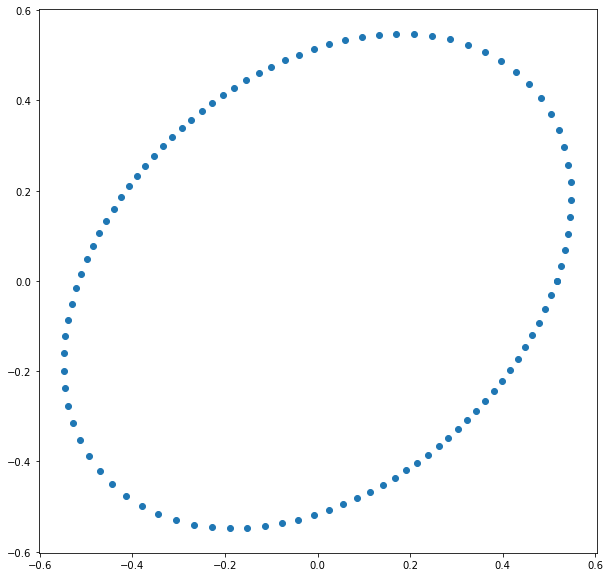

In [9]:
X,Y = [],[]
Nb_point = 100
c = 0.8
teta = np.linspace(0,2*np.pi,Nb_point)
for t in teta:
        dirx, diry = np.cos(t), np.sin(t)
        xf, yf = Newton(f1_test, dirx, diry)[0] #le choix de x0 et y0 est totalement arbitraire (il fallait juste que ça varie)
        X.append(xf)
        Y.append(yf)
plt.scatter(X,Y)
plt.show()

### Tache 3

In [10]:
def level_curve(f, x0, y0, delta=0.1, Nb=1000, eps=eps_newt):
    c = f(x0, y0)
    def f_delta(x,y):
        return np.array([f(x,y) - c, (x-x0)**2 + (y-y0)**2 - delta**2])
    grad_f = grad(f)
    Jf = J(f)
    X, Y = [x0], [y0]
    for i in range(Nb-1):
        dx, dy = grad_f(x0, y0)
        norme = np.sqrt(dx**2 + dy**2)
        x, y = Newton(f_delta, x0 + delta*dy/norme, y0 - delta*dx/norme, eps=eps)[0]
        X.append(x)
        Y.append(y)
        x0, y0 = x, y
    return np.array([X, Y])

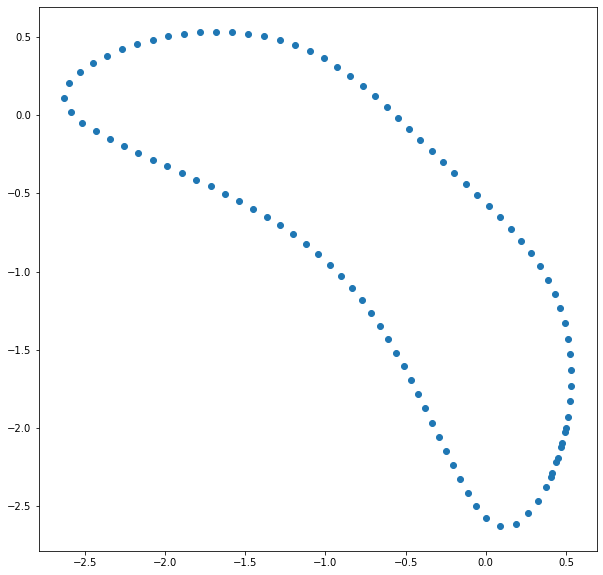

In [91]:
courbe = level_curve(f3, 0.5, -2.0, 0.1, 100)
plt.scatter(courbe[0], courbe[1])
plt.show()

### Tache 4

In [101]:
def seg_inter(seg1 : np.ndarray, seg2 : np.ndarray): 
    '''
    Renvoie un booléen caractérisant le croisement ou non de seg1 et seg2
    Ils se croisent        => True
    Ils ne se croisent pas => False
    '''
    point1, point2 = seg1
    point3, point4 = seg2
    d1 = point2 - point1 # x*dy - y*dx = c 
    d2 = point4 - point3
    change = np.array([[0,1],[-1,0]])  # change* [dx, dy] = [dy, -dx]
    e1 = change.dot(d1)
    e2 = change.dot(d2)
    c1 = np.vdot(point1, e1)
    c2 = np.vdot(point3, e2)
    # on veut déterminer le croisement des deux droites : AX = B
    A = np.array([e1, e2])
    B = np.array([c1, c2])
    try :
        inter = np.linalg.inv(A).dot(B)
    except numpy.linalg.LinAlgError:
        if point1 == point3 or point2 == point4 :
            return True
        return False
    if ((np.minimum(point1, point2) <= inter).all() 
        and (inter <= np.maximum(point1, point2)).all() 
        and (np.minimum(point3, point4) <= inter).all() 
        and (inter <= np.maximum(point3, point4)).all()):
        return True
    return False

In [102]:
def level_curve_stop(f, x0, y0, delta=0.1, eps=eps_newt):
    c = f(x0, y0)
    def f_delta(x,y):
        return np.array([f(x,y) - c, (x-x0)**2 + (y-y0)**2 - delta**2])
    grad_f = grad(f)
    Jf = J(f)
    X, Y = [x0], [y0]
    i = 0
    while i<= 4 or not seg_inter(np.array([[X[0], Y[0]],[X[1],Y[1]]]), np.array([[X[-2], Y[-2]],[x0, y0]])):
        i += 1
        dx, dy = grad_f(x0, y0)
        norme = np.sqrt(dx**2 + dy**2)
        x, y = Newton(f_delta, x0 + delta*dy/norme, y0 - delta*dx/norme, eps=eps)[0]
        X.append(x)
        Y.append(y)
        x0, y0 = x, y
    X.pop()
    Y.pop()
    return np.array([X, Y])

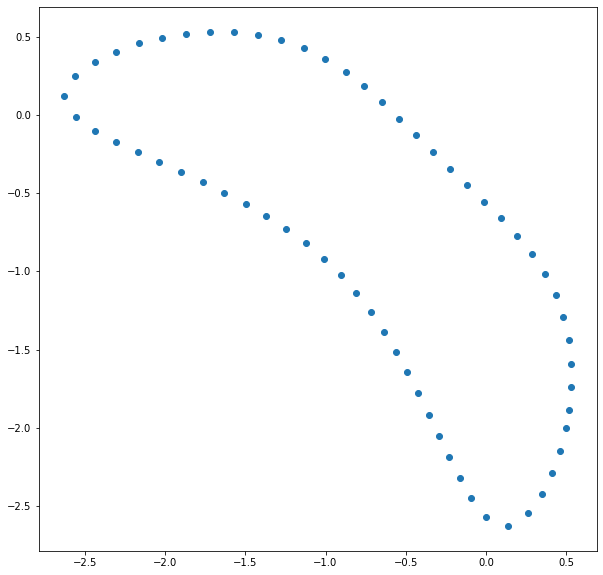

In [105]:
courbe = level_curve_stop(f3, 0.5, -2.0, 0.15)
plt.scatter(courbe[0], courbe[1])
plt.show()